# Data wrangling WeRateDogs

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators always greater than 10. 11/10, 12/10, 13/10, etc.  WeRateDogs has over 4 million followers and has received international media coverage.

The data we got in this project comes unclean. Using Python and its libraries, we will gather data from 3 kind of sources which are in a variety of formats. Then we will assess its quality and tidiness, then clean it using Python (and its libraries) .

In [1]:
#Import libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import pandas as pd
import requests
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from collections import Counter
from IPython.display import Image
import random
import matplotlib

## Gathering data
The first step is gathering data. our data was gathered by the following 3 ways:

1.Read csv file from local (twitter-archive-enhanced.csv);

2.Request file downloaded programmatically (image-predictions.tsv);

3.File (tweet_json.txt)constructed via API.




### Table 1: archive
Read the archive data in twitter_archive_enhanced.csv file from local.

In [2]:
# Read and check file content and structure
archive = pd.read_csv('twitter-archive-enhanced-2.csv', encoding = 'utf-8')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Table 2: image_prediction
URL downloaded programatically 

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


### Table 3: tweet_json
Query Twitter API for each tweet in the Twitter archive and save JSON in a text file.

In [ ]:

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'



auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = archive.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
           # print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)


In [7]:
# Read and check file content and structure
tweet_json =pd.read_json("tweet_json.txt" ,lines=True)
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,38046,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8323,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,32666,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6149,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,24579,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4069,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,41402,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,39578,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9164,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."


In [8]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

## Assessing data

### Visual assessment

In [9]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,38046,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8323,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,32666,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6149,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,24579,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4069,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,41402,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,39578,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9164,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,19873,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3049,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,11617,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2020,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,64208,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18467,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,27312,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4188,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,31332,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7219,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."


### Programmactic assessment

#### 1.Table: archive

In [12]:
# assessing the data programmaticaly
archive.info()
archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
sum(archive['tweet_id'].duplicated())

0

In [14]:
#WeRateDogs ratings almost always have a numerator greater than 10.
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# Function to print full text.
def text_full(numerator):
    print("Previous value is:"+str(numerator)) 
    print(archive[archive['rating_numerator'] == numerator]['tweet_id'])
    print('      ')
    print(archive[archive['rating_numerator'] == numerator]['text'])
    print('      ')

In [16]:
# Print out full text of those rows 
#whose numerator only shows one or two times in the archive.rating_numerator.value_counts()
def numerator_check():
    pd.set_option('display.max_colwidth', -1)
    text_full(420)
    text_full(75)
    text_full(80)
    text_full(24)
    text_full(26)
    text_full(44)
    text_full(50)
    text_full(60)
    text_full(165)
    text_full(84)
    text_full(88)
    text_full(144)
    text_full(182)
    text_full(143)
    text_full(666)
    text_full(960)
    text_full(1776)
    text_full(17)
    text_full(27)
    text_full(45)
    text_full(99)
    text_full(121)
    text_full(204)
    pd.set_option('max_colwidth',50) 
numerator_check()

Previous value is:420
188     855862651834028034
2074    670842764863651840
Name: tweet_id, dtype: int64
      
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074    After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   
Name: text, dtype: object
      
Previous value is:75
340    832215909146226688
695    786709082849828864
Name: tweet_id, dtype: int64
      
340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS            
Name: text, dtype: object
      
Previous value is:80
1254    710658690886586372
Name: tweet_id, dtype: int64
      
1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Name: text, dtype: object


In [17]:
#Check the numerator which is fractional numerator.
with pd.option_context('max_colwidth', 200):
    display(archive[archive['text'].str.contains(r"\d+\.\d*\/\d+")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [18]:
#WeRateDogs ratings almost always have a denominator of 10. 
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# Function to print full text with special rating_denominator
de_list=[]
def text_de(denominator):
    print("Previous denominator value is:"+str(denominator)) 
    print(archive[archive['rating_denominator'] == denominator]['tweet_id'])
    print('      ')
    print(archive[archive['rating_denominator'] == denominator]['text'])
    print('      ')
     
    tt=archive[archive['rating_denominator'] == denominator]['tweet_id']
    de_list.append(tt.tolist())

In [20]:
def denominator_check():
    pd.set_option('display.max_colwidth', -1)
    text_de(11)
    text_de(50)
    text_de(80)
    text_de(20)
    text_de(2)
    text_de(16)
    text_de(40)
    text_de(70)
    text_de(15)
    text_de(90)
    text_de(110)
    text_de(120)
    text_de(130)
    text_de(150)
    text_de(170)
    text_de(7)
    text_de(0)
    pd.set_option('max_colwidth',50) 
denominator_check()

Previous denominator value is:11
784     775096608509886464
1068    740373189193256964
1662    682962037429899265
Name: tweet_id, dtype: int64
      
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 
Name: text, dtype: object
      
Previous denominator value is:50
1202    716439118184652801
1274    709198395643068416
1351    704054845121142784
Name: tweet_id, dtype: int64
      
1202    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                             
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &am

#### 2. Table: image_prediction

In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [22]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
313,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True
1083,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,badger,0.356946,False,Boston_bull,0.252781,True,kelpie,0.113433,True
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True


In [23]:
sum(image_prediction.jpg_url.duplicated())

66

In [24]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [25]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### 3. Table tweet_json

In [26]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,38046,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8323,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,32666,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6149,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,24579,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4069,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,41402,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,39578,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9164,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."


In [27]:
tweet_json.info()
tweet_json.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2340.000000,0.0,2.340000e+03,2.340000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2205.0,2205.0,2.600000e+01,2.600000e+01,2340.000000
mean,NaN,NaN,7966.141026,NaN,7.422176e+17,7.422176e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2931.268803
std,NaN,NaN,12337.548664,NaN,6.832564e+16,6.832564e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4938.032325
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1376.250000,NaN,6.783394e+17,6.783394e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,588.750000
50%,NaN,NaN,3465.500000,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1369.000000
75%,NaN,NaN,9749.750000,NaN,7.986954e+17,7.986954e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3415.250000
max,NaN,NaN,164363.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,83713.000000


In [28]:
tweet_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2206
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [29]:
#check duplicated columns in those three tables.
all_table_columns = pd.Series(list(archive) + list(image_prediction) + list(tweet_json))
all_table_columns[all_table_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

## Quality and Tidiness

### archive table
*Keep only original ratings;

*Timestamp column should be in datetime format;

*Split 'datetime' column into 'date' column and 'time' column;

*Transform rating_numerator and rating_denominator columns type into float;

*Change some error in numerator;

*Correct (archive_clean.rating_numerator) fraction values;

*Correct denominators.


### image_prediction table
*Delete duplicated jpg_url;

*Merge prediction column together.


### tweet_json table
*Rename the id column to "tweet_id" to match the other 2 tables.


## Tidiness

### archive table
*Remove some columns won't be used in anaylze.

*Melt 'doggo','floofer','pupper','puppo'column into a new column 'dog_stage'.

### image_prediction table
*Delete columns won't be used in analyze.s.

### tweet_json table
*Remove the columns that won't be used

Joint all 3 tables together

## Cleaning data

In [30]:
# build new datasets to clean
archive_clean = archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()


###  Table:  archive_clean


#### 1.Define
Keep only original ratings (no retweets) that have images by removing rows of which the values in 'retweeted_status_id' column is not null.

#### Code

In [31]:
# Check how many retweet the table have:
sum(archive_clean.retweeted_status_user_id.value_counts())


181

In [32]:
# remove rows which 'retweeted_status_id' column is not null
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

Test

In [33]:
sum(archive_clean.retweeted_status_user_id.value_counts())

0

#### 2. Define
Convert 'timestamp' column format into datetime format

#### Code

In [34]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [35]:
np.dtype(archive_clean.timestamp)

dtype('<M8[ns]')

#### 3. Define
Split 'datetime' column into 'date' column and 'time' column.

#### Code

In [36]:
archive_clean['date'] = archive_clean.timestamp.apply(lambda x: x.strftime('%d-%b-%Y'))
archive_clean['time'] = archive_clean.timestamp.apply(lambda x: x.strftime('%I:%M:%S %p'))

#### Test

In [37]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None,18-Aug-2016,11:55:18 PM
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None,09-Dec-2015,05:46:48 PM
454,818536468981415936,NaN,NaN,2017-01-09 19:14:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Tom. He's a silly dog. Known for his u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818536468...,11,10,Tom,None,None,None,None,09-Jan-2017,07:14:36 PM



#### 4. Define

Transform rating_numerator and rating_denominator columns type into float

#### Code

In [38]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

#### Test

In [39]:
np.dtype(archive_clean.rating_numerator), np.dtype(archive_clean.rating_denominator)

(dtype('float64'), dtype('float64'))

#### 5.Define
Remove some columns won't be used in anaylze.

#### Code

In [40]:
archive_clean = archive_clean.drop(['timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp', 
                                    'expanded_urls'], 1)

#### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 220.9+ KB


#### 6. Define
Change some error in numerator

#### Code

In [42]:
#Function to correct denominator
def correct_den(id,newvalue):
    #archive[archive['tweet_id']==id].rating_numerator=newvalue
    archive_clean.loc[(archive_clean.tweet_id == id), 'rating_denominator'] = newvalue
    #archive_clean[archive_clean['tweet_id']== numerator]

In [43]:
#Function to correct numerator
def correct_nu(id,newvalue):
    #archive[archive['tweet_id']==id].rating_numerator=newvalue  
    archive_clean.loc[(archive_clean.tweet_id == id), 'rating_numerator'] = newvalue
    #print(archive_clean[archive_clean['tweet_id']== id])

In [44]:
numerator_check()

Previous value is:420
188     855862651834028034
2074    670842764863651840
Name: tweet_id, dtype: int64
      
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074    After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   
Name: text, dtype: object
      
Previous value is:75
340    832215909146226688
695    786709082849828864
Name: tweet_id, dtype: int64
      
340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS            
Name: text, dtype: object
      
Previous value is:80
1254    710658690886586372
Name: tweet_id, dtype: int64
      
1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Name: text, dtype: object


In [45]:
correct_nu(786709082849828864,9.75)#delet 810984652412424192 no rating
correct_nu(680494726643068929,11.26)#delet 697463031882764288 wrong denominator
correct_den(716439118184652801,10)
correct_nu(716439118184652801,11)
#delet 704054845121142784 wrong rating 60/50
#delet 758467244762497024  165/150   820690176645140481  84/74  675853064436391936 88/80
correct_den(835246439529840640,10)
correct_nu(835246439529840640,13)

correct_nu(881633300179243008,13)
correct_nu(778027034220126208,11.27)
correct_den(713900603437621249,10)
correct_nu(713900603437621249,11)
correct_den(684222868335505415,10)
correct_nu(684222868335505415,21)



#### Test

In [46]:
def testrating(id):
    df0=archive_clean[archive_clean['tweet_id']== id]
    print(df0.rating_numerator)
    print(df0.rating_denominator)

In [47]:
testrating(786709082849828864)
testrating(680494726643068929)
testrating(716439118184652801)
testrating(835246439529840640)
testrating(881633300179243008)
testrating(778027034220126208)
testrating(713900603437621249)
testrating(684222868335505415)


695    9.75
Name: rating_numerator, dtype: float64
695    10.0
Name: rating_denominator, dtype: float64
1712    11.26
Name: rating_numerator, dtype: float64
1712    10.0
Name: rating_denominator, dtype: float64
1202    11.0
Name: rating_numerator, dtype: float64
1202    10.0
Name: rating_denominator, dtype: float64
313    13.0
Name: rating_numerator, dtype: float64
313    10.0
Name: rating_denominator, dtype: float64
55    13.0
Name: rating_numerator, dtype: float64
55    10.0
Name: rating_denominator, dtype: float64
763    11.27
Name: rating_numerator, dtype: float64
763    10.0
Name: rating_denominator, dtype: float64
1228    11.0
Name: rating_numerator, dtype: float64
1228    10.0
Name: rating_denominator, dtype: float64
1635    21.0
Name: rating_numerator, dtype: float64
1635    10.0
Name: rating_denominator, dtype: float64


#### 7. Define

correct (archive_clean.rating_numerator) fraction values.


#### Code

In [48]:
#get the rows which has error rating_numerator
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"\d+\.\d*\/\d+")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.00,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.00,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [49]:
#correct numerators

archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5


#### Test

In [50]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"\d+\.\d*\/\d+")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### 8 Define
Correct denominators

#### Code

In [51]:
len(archive_clean[archive_clean['rating_denominator']!=10]) #18 rows 

18

In [52]:
a1=list(archive_clean[archive_clean['rating_denominator']!=10].tweet_id) #tweet_id of un 10 rating_denomiator
a1

[832088576586297345,
 820690176645140481,
 810984652412424192,
 758467244762497024,
 740373189193256964,
 731156023742988288,
 722974582966214656,
 710658690886586372,
 709198395643068416,
 704054845121142784,
 697463031882764288,
 686035780142297088,
 684225744407494656,
 682962037429899265,
 682808988178739200,
 677716515794329600,
 675853064436391936,
 666287406224695296]

In [53]:
denominator_check()

Previous denominator value is:11
784     775096608509886464
1068    740373189193256964
1662    682962037429899265
Name: tweet_id, dtype: int64
      
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 
Name: text, dtype: object
      
Previous denominator value is:50
1202    716439118184652801
1274    709198395643068416
1351    704054845121142784
Name: tweet_id, dtype: int64
      
1202    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                             
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &am

In [54]:
#correct some type extract error
correct_den(775096608509886464,10)
correct_nu(775096608509886464,14)
correct_den(740373189193256964,10)
correct_nu(740373189193256964,14)
correct_den(682962037429899265,10)
correct_nu(682962037429899265,10)
correct_den(716439118184652801,11)
correct_nu(716439118184652801,10)
correct_den(722974582966214656,10)
correct_nu(722974582966214656,13)
correct_den(666287406224695296,10)
correct_nu(666287406224695296,9)
correct_den(713900603437621249,10)
correct_nu(713900603437621249,11)

In [55]:
def delete_wrong_demoniator(index_value):    
    archive_clean.drop(index=index_value,inplace=True)
    return


In [56]:
a2=list(archive_clean[archive_clean['rating_denominator']!=10].index) #tweet_id of un 10 rating_denomiator
a2

[342,
 433,
 516,
 902,
 1120,
 1202,
 1254,
 1274,
 1351,
 1433,
 1598,
 1634,
 1663,
 1779,
 1843]

In [57]:
for i in a2:
    delete_wrong_demoniator(i)    

#### Test

In [58]:
len(archive_clean[archive_clean['rating_denominator']!=10])

0

#### 9. Define
Melt 'doggo','floofer','pupper','puppo'column into a new column 'dog_stage'. And if the dog to be defined has two attributes, we record it as 'multiple' in the new column. If the dog has no atributte, we record it as 'Unkown' in the new colulmn.

#### Code

In [59]:
archive_clean['dog_stage'] = 'default value'

In [60]:
arch_column = []
arch_id_list=archive_clean.tweet_id.unique()#"doggo",'floofer', "pupper", "puppo"
for id in arch_id_list:
    kk=archive_clean[archive_clean['tweet_id']== id]
 
    
    if ((kk.doggo == 'None').bool()&(kk.floofer == 'None').bool()
    &(kk.pupper == 'None').bool()&(kk.puppo =='None').bool()):
    
        a1='Unknown'
    elif ((kk.doggo == 'doggo').bool()&(kk.floofer == 'None').bool()
    &(kk.pupper == 'None').bool()&(kk.puppo =='None').bool()):
        a1 = 'doggo'
    elif ((kk.doggo == 'None').bool()&(kk.floofer == 'floofer').bool()
    &(kk.pupper == 'None').bool()&(kk.puppo =='None').bool()):
        a1 = 'floofer'
    elif ((kk.doggo == 'None').bool()&(kk.floofer == 'None').bool()
    &(kk.pupper == 'pupper').bool()&(kk.puppo =='None').bool()):
        a1 ='pupper'
    elif ((kk.doggo == 'None').bool()&(kk.floofer == 'None').bool()
    &(kk.pupper == 'None').bool()&(kk.puppo =='puppo').bool()):
        a1 ='puppo'
    else:
        a1 ='mulitple'
        
        
        
    arch_column.append(a1)

In [61]:
archive_clean['dog_stage']=arch_column

In [62]:
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)


#### Test

In [65]:
archive_clean.head(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,01-Aug-2017,04:23:56 PM,Unknown
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,01-Aug-2017,12:17:27 AM,Unknown
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,31-Jul-2017,12:18:03 AM,Unknown
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,30-Jul-2017,03:58:51 PM,Unknown
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,29-Jul-2017,04:00:24 PM,Unknown


In [66]:
archive_clean[archive_clean['tweet_id']==854010172552949760].dog_stage

200    mulitple
Name: dog_stage, dtype: object

### Table: image_prediction

#### 10.  Define
image_prediction  Delete duplicated jpg_url

#### Code

In [67]:
image_prediction_clean=image_prediction.copy()
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [68]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

#### 11. Define
Merge prediction column together

#### Code

In [69]:
# store prediction in list.
dog_breed = []
algorithm_confident = []


#create a function to put value in the list which will be assigned to the new column
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_breed.append(image_prediction_clean['p1'])
        algorithm_confident.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_breed.append(image_prediction_clean['p2'])
        algorithm_confident.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_breed.append(image_prediction_clean['p3'])
        algorithm_confident.append(image_prediction_clean['p3_conf'])
    else:
        dog_breed.append('Unknown')
        algorithm_confident.append('Unknown')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns to storing value
image_prediction_clean['dog_breed'] = dog_breed
image_prediction_clean['algorithm_confident'] = algorithm_confident

In [70]:
#drop rows that has prediction_list 'Unknown'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_breed'] != 'Unknown']

#### Test

In [71]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id               1691 non-null int64
jpg_url                1691 non-null object
img_num                1691 non-null int64
p1                     1691 non-null object
p1_conf                1691 non-null float64
p1_dog                 1691 non-null bool
p2                     1691 non-null object
p2_conf                1691 non-null float64
p2_dog                 1691 non-null bool
p3                     1691 non-null object
p3_conf                1691 non-null float64
p3_dog                 1691 non-null bool
dog_breed              1691 non-null object
algorithm_confident    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### 12.  Define
Delete columns won't be used in analyze.

#### Code

In [72]:
#print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_breed', 'algorithm_confident']


#### Test

In [73]:
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_breed', 'algorithm_confident']

### Table: tweet_json

#### 13. Define
Rename the id column to "tweet_id" to match the other 2 tables.

#### Code

In [74]:
tweet_json_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

#### Test

In [75]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
tweet_id                         2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

#### 14.  Define

Remove the columns that won't be used.

#### Code

In [76]:
tweet_json_clean = tweet_json_clean.loc[:, ['tweet_id', 'favorite_count','retweet_count']]

### Test

In [77]:
tweet_json_clean.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38046,8323
1,892177421306343426,32666,6149
2,891815181378084864,24579,4069


#### 15. Define

Joint all 3 tables together

#### Code

In [78]:
df= pd.merge(pd.merge(archive_clean, image_prediction_clean, on='tweet_id'), tweet_json_clean, on = 'tweet_id')

#### Test

In [79]:
df.head(3)

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,dog_stage,jpg_url,dog_breed,algorithm_confident,favorite_count,retweet_count
0,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,01-Aug-2017,12:17:27 AM,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,32666,6149
1,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,31-Jul-2017,12:18:03 AM,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,24579,4069
2,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,30-Jul-2017,03:58:51 PM,Unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,41402,8470


### Storing, Analyzing, and Visualizing

In [80]:
#storing data as twitter_archive_master.csv
df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

#### 1.Get known about dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 1612
Data columns (total 14 columns):
tweet_id               1613 non-null int64
source                 1613 non-null object
text                   1613 non-null object
rating_numerator       1613 non-null float64
rating_denominator     1613 non-null float64
name                   1613 non-null object
date                   1613 non-null object
time                   1613 non-null object
dog_stage              1613 non-null object
jpg_url                1613 non-null object
dog_breed              1613 non-null object
algorithm_confident    1613 non-null object
favorite_count         1613 non-null int64
retweet_count          1613 non-null int64
dtypes: float64(2), int64(3), object(9)
memory usage: 189.0+ KB


#### 2.Top 10 algorithm_confident

In [82]:
df.sort_values('algorithm_confident', ascending = False)[0:9][['dog_breed', 'algorithm_confident']]

,dog_breed,algorithm_confident
1497,komondor,0.999956
531,chow,0.999953
1260,chow,0.999876
817,chow,0.999837
310,dalmatian,0.999828
469,chow,0.999823
230,Old_English_sheepdog,0.999715
1149,pug,0.999365
947,Great_Dane,0.999223


In [83]:
df.algorithm_confident.describe()

count     1613.000000
unique    1610.000000
top          0.786089
freq         2.000000
Name: algorithm_confident, dtype: float64

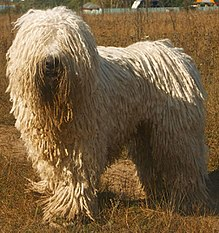

In [84]:
Image(filename="Komondor.jpg")#https://en.wikipedia.org/wiki/Komondor

Picture from wikipedia:https://en.wikipedia.org/wiki/Komondor

Komondor dog has the max algorithm confident, while the mean of algorithm confident of dateset is only 0.55. We also can find out the top 10 algorithm confident are very close to each other, all of them above 0.99.

#### 3. Source 

There are three kind of source, we want to find out which kind of source is the most tweet came from.

In [85]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1585
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1585
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64


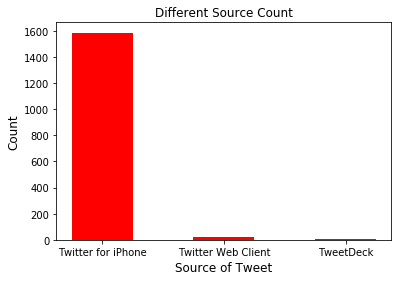

In [86]:
source_count=df.source.value_counts()
plt.subplots(figsize=(6,4))
plt.bar(source_count.index, source_count,width=0.5,align='center',color='red')

plt.ylabel('Count',fontsize=12)
plt.xlabel('Source of Tweet',fontsize=12)
plt.xticks(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
            '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
           
           ['Twitter Web Client','Twitter for iPhone','TweetDeck'])
plt.title('Different Source Count')
print (source_count)
fig = plt.gcf()
fig.savefig('count_Source.png',bbox_inches='tight');

Twitter for iPhone source is the main source of tweet came from. while the other two kind of source count is very similar, and much less than the count of iPhone source.

#### 4. Rating against source of tweet

we want to find out whether the source of tweet will effect the rating.

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     10.150000
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     10.813741
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11.125000
Name: rating_numerator, dtype: float64


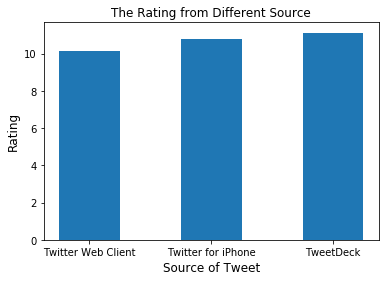

In [87]:
rating_mean=df.groupby(['source']).rating_numerator.mean()
plt.subplots(figsize=(6,4))
plt.bar(rating_mean.index,rating_mean,width=0.5,align='center')

plt.ylabel('Rating',fontsize=12)
plt.xlabel('Source of Tweet',fontsize=12)
plt.xticks(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
            '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
           
           ['Twitter Web Client','Twitter for iPhone','TweetDeck'])
plt.title('The Rating from Different Source')
print (rating_mean)

fig = plt.gcf()
fig.savefig('Rating_Source.png',bbox_inches='tight');

The rating from all kind of source are very close to each other. We cann't point out which kind of source likely to make a higher rating. 

#### 5. The most rated dog

In [88]:
df.dog_breed.value_counts()

golden_retriever                  141
Labrador_retriever                100
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               44
Pomeranian                         42
Samoyed                            37
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     29
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          20
Shih-Tzu                           20
beagle                             19
Siberian_husky                     19
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
Cardigan                           19
kuvasz                             18
basset                             17
Lakeland_ter

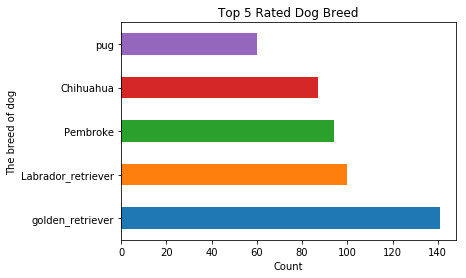

In [89]:
df_dog_breed = df.groupby('dog_breed').filter(lambda x: len(x) >= 55)

df_dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Top 5 Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('The breed of dog')

fig = plt.gcf() 
fig.savefig('most_rated_dog.png',bbox_inches='tight');

From above plot, we can see 'golden_retriever' is the most rated dog breed.And the other top 5 liked to be rated dog breed is 'Labrador retriever', 'Pembroke','Chihuahua' and 'Pug'.

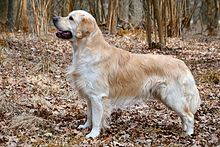

In [90]:
Image(filename="Golden_Retriever.jpg")
#https://en.wikipedia.org/wiki/Golden_Retriever

Picture from wikipedia:https://en.wikipedia.org/wiki/Golden_Retriever

#### 6. Rating vs. favorite count and retweet count

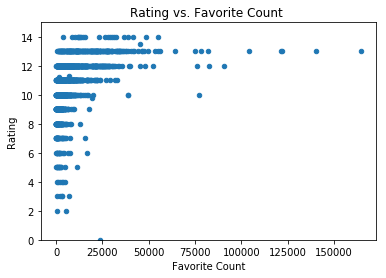

In [91]:
df.plot(x='favorite_count', y='rating_numerator', kind='scatter')
plt.xlabel('Favorite Count')
plt.ylabel('Rating')
plt.title('Rating vs. Favorite Count ')
#plt.xlim(0,100000)
plt.ylim(0,15)
fig = plt.gcf()
fig.savefig('rating_vs_favoritecount.png',bbox_inches='tight');

Based on above plot, we can see the most favorite count is like to give rating around 13/10.

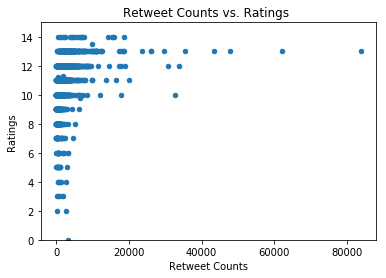

In [92]:
df.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts vs. Ratings ')
plt.ylim(0,15)

fig = plt.gcf()
fig.savefig('rating_vs_retweetcount.png',bbox_inches='tight');

From above plot, we can see the highest ratings do not receive the most retweets. And the most retweet  gave rating around 13/10. This plot tendency like the relationship between rating and favoriate count. So maybe there is strong relationship between retweet count and favoriate count. 

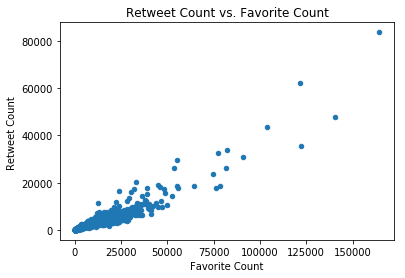

In [93]:
df.plot(x='favorite_count', y='retweet_count', kind='scatter')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count ')
plt.title('Retweet Count vs. Favorite Count')

fig = plt.gcf()
fig.savefig('retweet_vs_favorite.png',bbox_inches='tight');

As we guss,retweet count has strong relationship to favorite count. The more retweet count, the more favorite count. Next, we calculate correlation of each parameters.

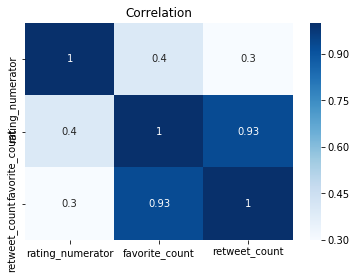

In [94]:
# correlation 
df1=df.drop(['rating_denominator','tweet_id'], axis=1)#drop column we don't need.
corr = df1.corr()
plt.title('Correlation')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,
           cmap='Blues');
fig = plt.gcf()
fig.savefig('correlation.png',bbox_inches='tight')

The correlation value between retweetv count and favorite count is 0.93(>0.7). It means they have very strong   relationship between each other. 

#### 7. Dog stage composition

In [95]:
df.dog_stage.value_counts()

Unknown     1362
pupper       165
doggo         51
puppo         20
mulitple       8
floofer        7
Name: dog_stage, dtype: int64

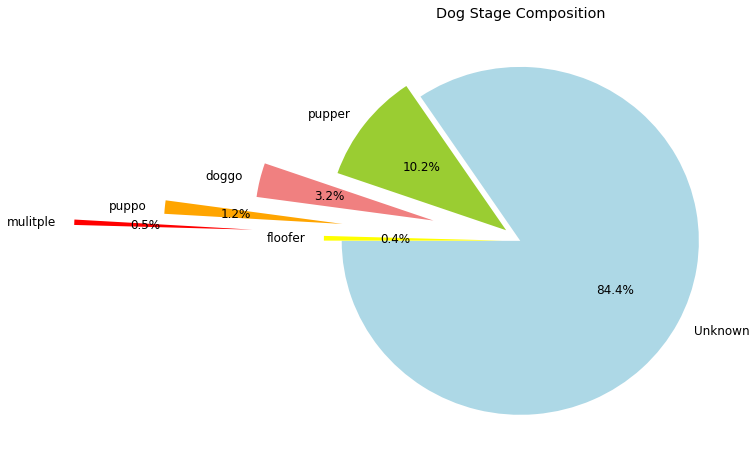

In [102]:
labels = df.dog_stage.value_counts().index.tolist()
sizes = df.dog_stage.value_counts().tolist()
colors = ['lightblue', 'yellowgreen', 'lightcoral','orange', 'red','yellow']
explode = (0, 0.1, 0.5, 1,1.5,0.1)
# Plot
plt.figure(figsize=(8, 8))
matplotlib.rcParams['font.size'] = 12
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.title('Dog Stage Composition') 
fig = plt.gcf()
fig.savefig('dog_stage_composition.png',bbox_inches='tight')

Most dogs don't have a 'dog-stage' (84%). The ones defined dog stage, are most defined as pupper  (usually a younger dog).

#### Reference:
https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas

https://datascience.stackexchange.com/questions/16653/unable-to-open-json-file-in-pandas

https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns

https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin

https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups

https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

https://en.wikipedia.org/wiki/Golden_Retriever

https://en.wikipedia.org/wiki/Komondor

https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/